In [1]:
%matplotlib inline

import collections

import matplotlib.pyplot as plt
import numpy as np

In [2]:
def roll_n_sided_dice(n=6):
    """
    Roll a dice with n sides.
    """
    return np.random.randint(1, n + 1)

class MoranProcess:
    """
    A class for a moran process with a population of 
    size N=3 using the standard Hawk-Dove Game:
    
    A = 
       [0, 3]
       [1, 2]

    Note that this is a simulation corresponding to an 
    in class activity where students roll dice.
    """
    def __init__(self, number_of_hawks=1, seed=None):
        
        if seed is not None:
            np.random.seed(seed)
            
        self.number_of_hawks = number_of_hawks
        self.number_of_doves = 3 - number_of_hawks
        
        self.dice_and_values_for_hawk_birth = {1: (6, {1, 2, 3}), 2: (4, {1, 2, 3})}
        self.dice_and_values_for_hawk_death = {1: (6, {1, 2}), 2: (6, {1, 2, 3, 4})}

        self.history = [(self.number_of_hawks, self.number_of_doves)]
        
    def step(self):
        """
        Select a hawk or a dove for birth.
        Select a hawk or a dove for death.
        
        Update history and states.
        """      
        birth_dice, birth_values = self.dice_and_values_for_hawk_birth[self.number_of_hawks]
        death_dice, death_values = self.dice_and_values_for_hawk_death[self.number_of_hawks]

        select_hawk_for_birth = self.roll_dice_for_selection(dice=birth_dice, values=birth_values)
        select_hawk_for_death = self.roll_dice_for_selection(dice=death_dice, values=death_values)
       
        if select_hawk_for_birth:
            self.number_of_hawks += 1
        else:
            self.number_of_doves += 1
            
        if select_hawk_for_death:
            self.number_of_hawks -= 1
        else:
            self.number_of_doves -= 1
        
        self.history.append((self.number_of_hawks, self.number_of_doves))

             
    def roll_dice_for_selection(self, dice, values):
        """
        Given a dice and values return if the random roll is in the values.
        """
        return roll_n_sided_dice(n=dice) in values
        
    def simulate(self):
        """
        Run the entire simulation: repeatedly step through 
        until the number of hawks is either 0 or 3.
        """
        while self.number_of_hawks in [1, 2]:
            self.step()
        return self.number_of_hawks
    
    def __len__(self):
        return len(self.history)

In [3]:
repetitions = 10 ** 7
end_states = []
path_lengths = []
for seed in range(repetitions):
    mp = MoranProcess(seed=seed)
    end_states.append(mp.simulate())
    path_lengths.append(len(mp))

In [4]:
counts = collections.Counter(end_states)
counts[3] / repetitions

0.5452601

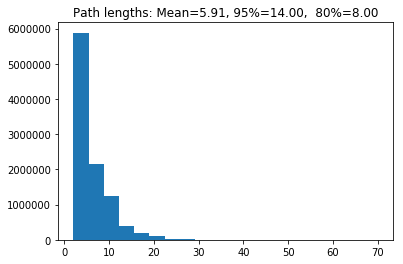

In [5]:
plt.hist(path_lengths, bins=20)
plt.title("Path lengths: Mean={:0.2f}, 95%={:0.2f},  80%={:0.2f}".format(np.mean(path_lengths), 
                                                                         np.percentile(path_lengths, 95),
                                                                         np.percentile(path_lengths, 80)));

Note that this is not how we would do this in practice:

In [6]:
P = np.array([[1, 0, 0, 0],
              [1 / 6, 1 / 2, 1 / 3, 0],
              [0, 1 / 6, 7 / 12, 1 / 4],
              [0, 0, 0, 1]])
np.round(np.linalg.matrix_power(P, 100)[1], 4)

array([ 0.4545,  0.    ,  0.    ,  0.5455])

In [7]:
def theoretic_fixation(N, game, i=1):
    """
    Calculate x_i
    """
    f_ones = np.array([(game[0, 0] * (i - 1) + game[0, 1] * (N - i)) / (N - 1) for i in range(1, N)])
    f_twos = np.array([(game[1, 0] * i + game[1, 1] * (N - i - 1)) / (N - 1) for i in range(1, N)])
    gammas = f_twos / f_ones
    return (1 + np.sum(np.cumprod(gammas[:i-1]))) / (1 + np.sum(np.cumprod(gammas)))

In [8]:
theoretic_fixation(N=3, game=np.array([[0, 3], [1, 2]]), i=1)

0.54545454545454553

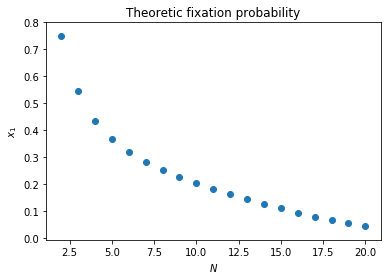

In [9]:
Ns = range(2, 20 + 1)
fixations = [theoretic_fixation(N=n, game=np.array([[0, 3], [1, 2]]), i=1)
             for n in Ns]
plt.scatter(Ns, fixations)
plt.xlabel("$N$")
plt.ylabel("$x_1$")
plt.title("Theoretic fixation probability");